# Pairs Trading
In this notebook, we will delve into the concept of pairs trading, understand the underlying principles, and learn how to implement and evaluate pairs trading strategies using Python. We will explore the steps involved in identifying suitable pairs, formulating trading rules, and assessing the profitability and risk of our trading strategies.

Pairs trading is based on the notion that, over time, the prices of two assets that are historically correlated tend to revert to their mean relationship. This mean reversion behavior forms the foundation of the strategy, which involves taking long and short positions in the two assets to profit from the expected convergence of their prices.

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

#### Data

In [2]:
dov = yf.download('DOV','2021-01-01',datetime.today(), progress=False)['Close'].rename('Dover Corp.')
ame = yf.download('AME','2021-01-01',datetime.today(), progress=False)['Close'].rename('Ametek Inc.')

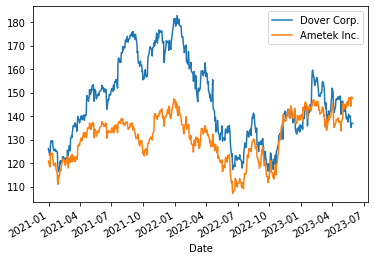

In [3]:
pd.concat([dov, ame], axis=1).plot();

#### Spread visualization

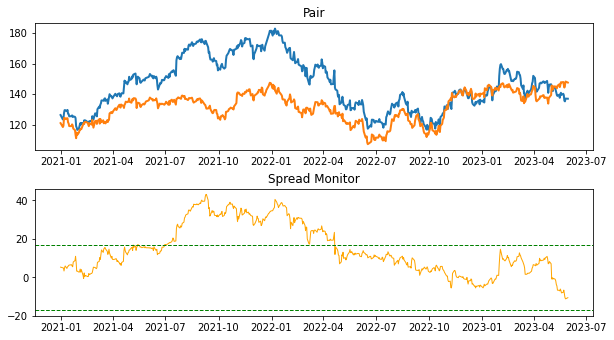

In [10]:
plt.figure(figsize=(10,6))
# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(dov, linewidth=2)
ax1.plot(ame, linewidth=2)
ax1.set_title('Pair')

# Second chart
# Plot the Spread
spreads = dov-ame
ax2.set_title('Spread Monitor')
ax2.plot(spreads, color='orange', linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(17, linestyle='--', linewidth=1, color='green')
# Overbought
ax2.axhline(-17, linestyle='--', linewidth=1, color='green');

#### Translate into a strategy

In [11]:
transactions = {'date': [], 'price': [], 'transaction': [], 'firm': []}

signal = 0
for i, spread in enumerate(spreads):
    if spread > 17 and signal != 1:
        transactions['date'].append(dov.index[i])
        transactions['price'].append(dov[i])
        transactions['transaction'].append('Short')
        transactions['firm'].append('Dover')
        transactions['date'].append(ame.index[i])
        transactions['price'].append(ame[i])
        transactions['transaction'].append('Long')
        transactions['firm'].append('Ametek')
        signal = 1
    elif spread <= 17 and signal == 1:
        transactions['date'].append(dov.index[i])
        transactions['price'].append(dov[i])
        transactions['transaction'].append('Long')
        transactions['firm'].append('Dover')
        transactions['date'].append(ame.index[i])
        transactions['price'].append(ame[i])
        transactions['transaction'].append('Short')
        transactions['firm'].append('Ametek')
        signal = 0
    if spread < -17 and signal != -1:
        transactions['date'].append(dov.index[i])
        transactions['price'].append(dov[i])
        transactions['transaction'].append('Long')
        transactions['firm'].append('Dover')
        transactions['date'].append(ame.index[i])
        transactions['price'].append(ame[i])
        transactions['transaction'].append('Short')
        transactions['firm'].append('Ametek')
        signal = -1
    elif spread <= 17 and signal == -1:
        transactions['date'].append(dov.index[i])
        transactions['price'].append(dov[i])
        transactions['transaction'].append('Short')
        transactions['firm'].append('Dover')
        transactions['date'].append(ame.index[i])
        transactions['price'].append(ame[i])
        transactions['transaction'].append('Long')
        transactions['firm'].append('Ametek')
        signal = 0
        
transactions = pd.DataFrame(transactions)
transactions

,date,price,transaction,firm
0,2021-05-14,151.399994,Short,Dover
1,2021-05-14,134.339996,Long,Ametek
2,2021-05-17,150.330002,Long,Dover
3,2021-05-17,133.940002,Short,Ametek
4,2021-06-30,150.600006,Short,Dover
5,2021-06-30,133.500000,Long,Ametek
6,2021-07-02,151.800003,Long,Dover
7,2021-07-02,134.940002,Short,Ametek
8,2021-07-06,150.570007,Short,Dover
9,2021-07-06,133.000000,Long,Ametek


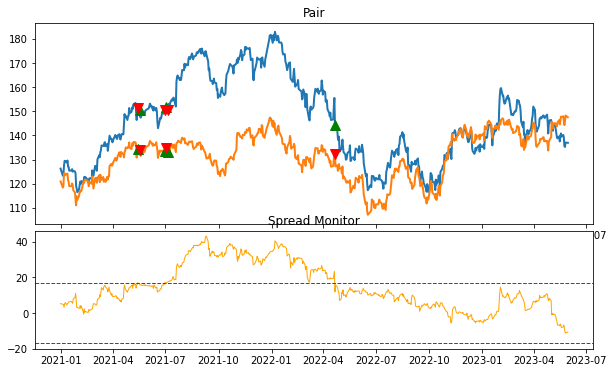

In [12]:
plt.figure(figsize=(10,6))

buys = transactions[transactions.transaction == 'Long'].copy()
sells = transactions[transactions.transaction == 'Short'].copy()


ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
ax1.plot(dov, linewidth=2)
ax1.plot(ame, linewidth=2)
ax1.set_title('Pair')
ax1.plot(buys.date, buys.price, marker = '^', color = 'green', markersize = 10, label = 'Long', linewidth = 0)
ax1.plot(sells.date, sells.price, marker = 'v', color = 'r', markersize = 10, label = 'Short', linewidth = 0)
ax1.plot(closes.date, closes.price, marker = '.', color = 'orange', markersize = 10, label = 'Close', linewidth = 0)


spreads = dov-ame
ax2.set_title('Spread Monitor')
ax2.plot(spreads, color='orange', linewidth=1)
ax2.axhline(17, linestyle='--', linewidth=1, color='green')
ax2.axhline(-17, linestyle='--', linewidth=1, color='green');